# Demo notebook of the PulseBuilder_v3

In [2]:
from pyHegel import *
from pyHegel.commands import *
from pyHegel.instruments import *

#awg = instruments.tektronix.tektronix_AWG('TCPIP0::AWG5200-XXXX.mshome.net::inst0::INSTR')
#rto = instruments.rohdeschwarz.rs_rto_scope('USB0::0x0AAD::0x0197::1329.7002k14-300206::INSTR')

Fixing mpl_toolkit log scale transform bug of 2.2.x
Unable to load Agilent visa library. Will try the default one (National Instruments?).
Error loading visa resource manager. You will have reduced functionality.


C:\Codes\QIQSS-CODE\CodePulse\v3


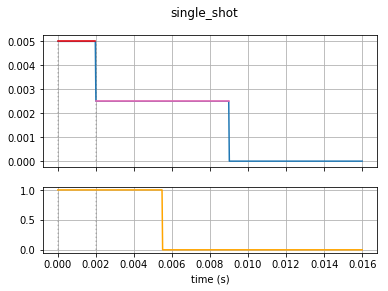

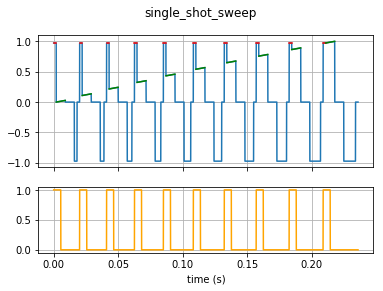

In [3]:
%cd C:\Codes\QIQSS-CODE\CodePulse\v3
%run -i pulse_v3.py

sample_rate = 32e3

# A Segment is a combination of AtomSegment
# We insert AtomSegment in a Segment with:
# segment.insert(Atom) or,
# segment.insertNew(AtomType, (args), duration, name) or,
# segment.insertStep([values], [durations], [names]:optional)

single_shot = Segment('single_shot')
single_shot.insertStep([0.005, 0.0025, 0], 
                       [2e-3, 7e-3, 7e-3], 
                       ['inject_wait', 'readout', 'empty'])
single_shot.mark('inject_wait')
single_shot.mark('readout', (0, 0.5))

# Function to draw a segment (or later a sequence), with highlights.
pulseDraw(single_shot, sample_rate,
          highlight_atoms=[('inject_wait','red'), ('readout','hotpink')],
          vert_lines=True)

# Create a concatenation of segment, with 
# varying parameters, 
# converting some constants to slope,
# adding a wait time between each.
multiple_shot = single_shot.makeVaryingSequence(10,
    ['readout'], ['value'], [(0.,0.005)],
    wait_time=0.002, constant_slope=[('readout',0.02)], compensate=-0.005,
    name='single_shot_sweep')

# Draw the sequence.
pulseDraw(multiple_shot, sample_rate, normalize=True,
          highlight_atoms=[('inject_wait','red'), ('readout','green')])

#sendSequence(awg, multiple_shot, sample_rate, force=True)
#awg.output_en.set(True)
#awg.run()


C:\Codes\QIQSS-CODE\CodePulse\v3
{'inject_wait': (0.0, 1.0), 'readout': (0, 0.5)}
{'color': 'tab:blue', 'alpha': 0.2}
{'color': 'tab:blue', 'alpha': 0.4}
{'color': 'tab:blue', 'alpha': 0.6}
{'color': 'tab:blue', 'alpha': 0.8}
{'color': 'tab:blue', 'alpha': 1.0}


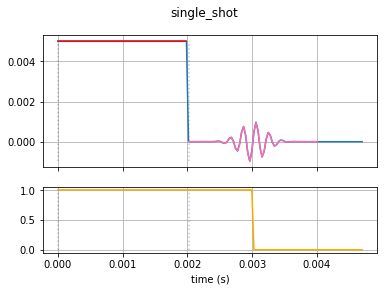

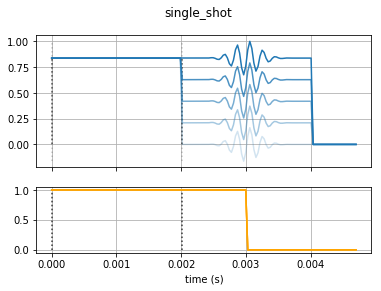

In [7]:

%cd C:\Codes\QIQSS-CODE\CodePulse\v3
%run -i pulse_v3.py

sample_rate = 32e3

single_shot = Segment('single_shot')
# An other way to insert:
#single_shot.insertNew(Constant, value, duration, 'name')
#single_shot.insertNew(Ramp, (start, finish), duration, 'name')
#single_shot.insertNew(Sine, (ampl, freq, phase, offset), duration, 'name')

single_shot.insertNew(Constant, 'inject_wait', 0.005, 2e-3)
single_shot.insertNew(GaussianSine, 'readout', (5000, 0.001, 0, 0, 0.0002, 0), 2e-3)
single_shot.insertNew(Constant, 'empty', 0, 7e-4)

single_shot.mark('inject_wait')
single_shot.mark('readout', (0, 0.5))

print single_shot.marks_dict

pulseDraw(single_shot, sample_rate,
          highlight_atoms=[('inject_wait','red'), ('readout','hotpink')],
          vert_lines=True)

multiple_shot = single_shot.makeVaryingSequence(5,
    ['readout'], ['offset'], [(0,0.005)],
    name='single_shot_sweep')
pulseDraw(multiple_shot, sample_rate, normalize=True,
          superpose=True,
          color='tab:blue')



Running under ipython
Running under ipython remote kernel
Redirecting __stderr__ for spyder
Enabling qt5 gui loop handling in ipython


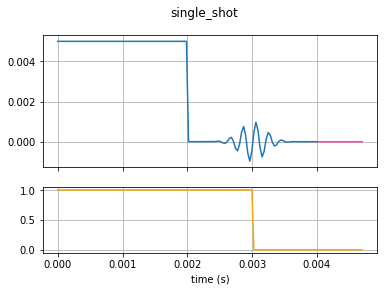

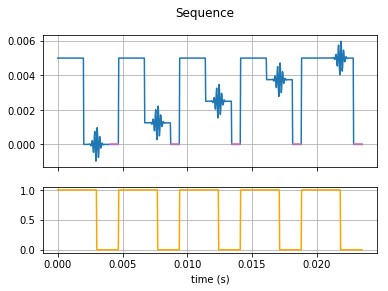

{'color': 'tab:blue', 'alpha': 0.2}
{'color': 'tab:blue', 'alpha': 0.4}
{'color': 'tab:blue', 'alpha': 0.6}
{'color': 'tab:blue', 'alpha': 0.8}
{'color': 'tab:blue', 'alpha': 1.0}
{'color': 'tab:blue', 'alpha': 0.2}
{'color': 'tab:blue', 'alpha': 0.4}
{'color': 'tab:blue', 'alpha': 0.6}
{'color': 'tab:blue', 'alpha': 0.8}
{'color': 'tab:blue', 'alpha': 1.0}
{'color': 'tab:blue', 'alpha': 0.2}
{'color': 'tab:blue', 'alpha': 0.4}
{'color': 'tab:blue', 'alpha': 0.6}
{'color': 'tab:blue', 'alpha': 0.8}
{'color': 'tab:blue', 'alpha': 1.0}
{'color': 'tab:blue', 'alpha': 0.2}
{'color': 'tab:blue', 'alpha': 0.4}
{'color': 'tab:blue', 'alpha': 0.6}
{'color': 'tab:blue', 'alpha': 0.8}
{'color': 'tab:blue', 'alpha': 1.0}
{'color': 'tab:blue', 'alpha': 0.2}
{'color': 'tab:blue', 'alpha': 0.4}
{'color': 'tab:blue', 'alpha': 0.6}
{'color': 'tab:blue', 'alpha': 0.8}
{'color': 'tab:blue', 'alpha': 1.0}
{'color': 'tab:blue', 'alpha': 0.2}
{'color': 'tab:blue', 'alpha': 0.4}
{'color': 'tab:blue', 'alpha

In [6]:

# Open PulseBuilder GUI with current pulse
import PulseBuilder
%run PulseBuilder.py
pb.loadSeq(multiple_shot, sample_rate)

In [276]:
%run -i pulse_v3.py
## Code generated from PulseBuilder GUI ##
sample_rate = 1000

## Generating segment ##
mySegment = Segment("Segment")
# atoms
mySegment.insertNew(Constant, 'const_0', (0.0,), 1.0, )
mySegment.insertNew(Ramp, 'ramp_0', (0, 1.0), 1, )
mySegment.insertNew(Sine, 'sine_0', (1.0, 1, 0, 0), 1, )
mySegment.insertNew(GaussianSine, 'gaussian_sine_0', (1, 7.0, 0, 0.0, -13.9, -1.0), 1, )
# marks
mySegment.mark('const_0', (0, 0.0), )

## Generate sequence ##
mySequence = mySegment.makeVaryingSequence(14,
        ['gaussian_sine_0', 'gaussian_sine_0', 'gaussian_sine_0', 'gaussian_sine_0', 'gaussian_sine_0', 'gaussian_sine_0'],
        ['duration', 'frequency', 'amplitude', 'mu', 'sigma', 'offset'],
        [(0.0, 20.0), (5.0, 4.0), (5.0, 36.0), (4.0, 22.0), (0.0, 10.0), (0.0, 5.0)],
        constant_slope=[],
        wait_time=12.0,
        compensate=8.0,
        name='Sequence')


#import PulseBuilder
#%run -i PulseBuilder
#myapp.loadSeq(mySequence)